# 8장 자연어 처리 시작하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 설치 목록
    * JDK (Java SE Downloads)
    * JAVA_HOME 설정
    * JPype 설치
    * KoNLPy 설치
    * Word Cloud 설치

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy : **pip install konlpy**
* JPype1 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치
    * JAVA_HOME 설정 : 교재내용 참조

In [1]:
!pip install konlpy

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2


## 8-2. 한글 자연어 처리 기초

In [4]:
from konlpy.tag import Kkma
kkma = Kkma()

In [5]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [6]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [7]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [8]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [9]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [10]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [11]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [12]:
from konlpy.tag import Twitter
t = Twitter()

C:\Users\edu\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [13]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [15]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [16]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 8-3. 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

In [18]:
!pip install wordcloud

In [19]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [21]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [22]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

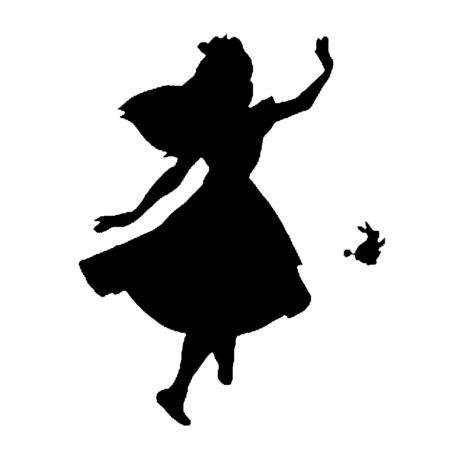

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'said Alice': 0.5888324873096447,
 'little': 0.4619289340101523,
 'the Queen': 0.36548223350253806,
 'one': 0.3197969543147208,
 'the King': 0.3147208121827411,
 'thing': 0.29949238578680204,
 'now': 0.28426395939086296,
 'Mock Turtle': 0.28426395939086296,
 'the Mock': 0.26903553299492383,
 'the Gryphon': 0.26903553299492383,
 'time': 0.2639593908629442,
 'quite': 0.2639593908629442,
 'the Hatter': 0.2639593908629442,
 'way': 0.25888324873096447,
 'think': 0.2436548223350254,
 'went on': 0.2436548223350254,
 'you know': 0.22842639593908629,
 'first': 0.2182741116751269,
 'come': 0.2182741116751269,
 'voice': 0.2131979695431472,
 'the Duchess': 0.20812182741116753,
 'Why': 0.20304568527918782,
 'never': 0.19289340101522842,
 "I'm": 0.18781725888324874,
 'tone': 0.18781725888324874,
 'came': 0.17766497461928935,
 'the Dormouse': 0.17766497461928935,
 'nothing': 0.17258883248730963,
 'day': 0.16751269035532995,
 'large': 0.16751269035532995,
 'well': 0.16243654822335024,


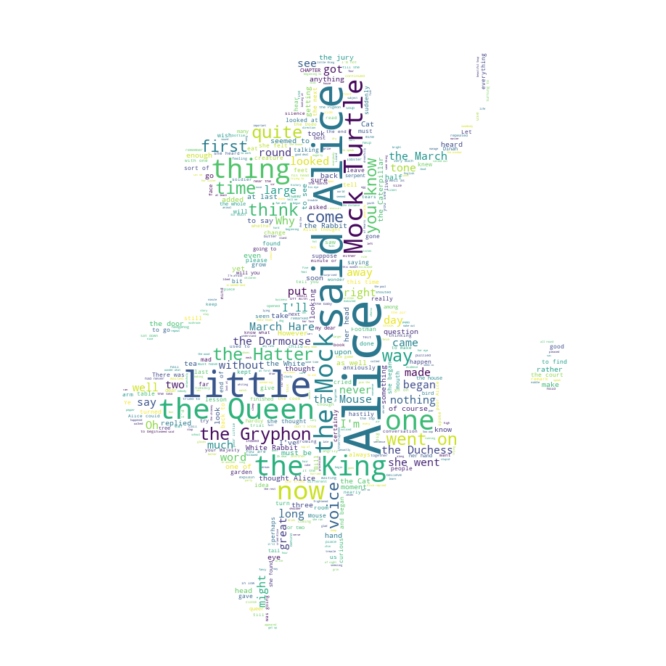

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
text = open('../data/09. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

In [28]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [29]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [30]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

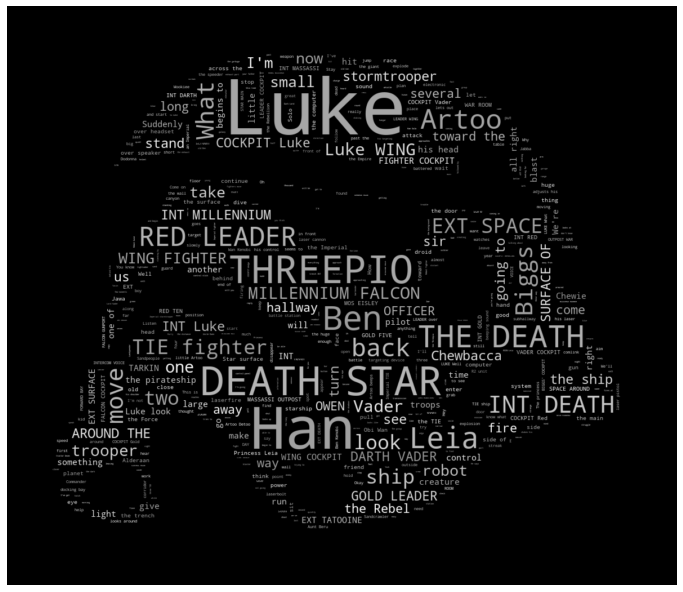

In [31]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 8-4. 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [34]:
import nltk

In [35]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [36]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [37]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

C:\Users\edu\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [40]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
ko.tokens

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [42]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()                        # returns frequency distribution

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

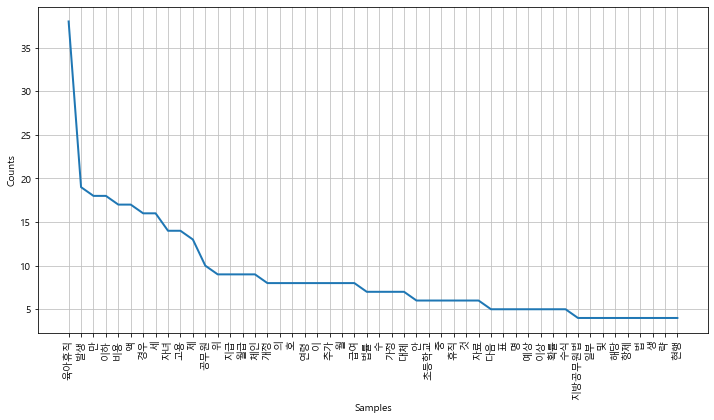

In [43]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [44]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

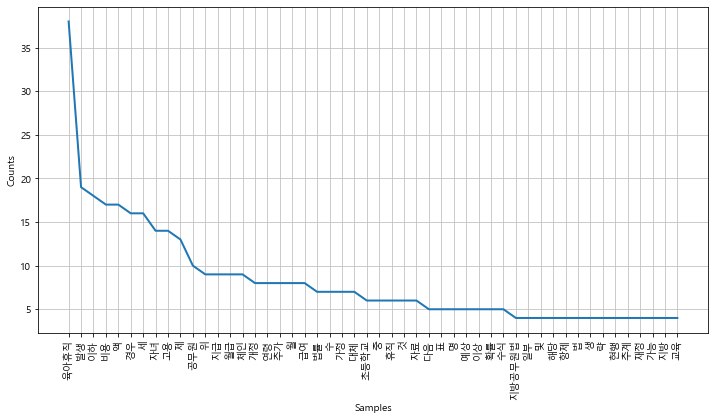

In [45]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [33]:
ko.count('초등학교')

6

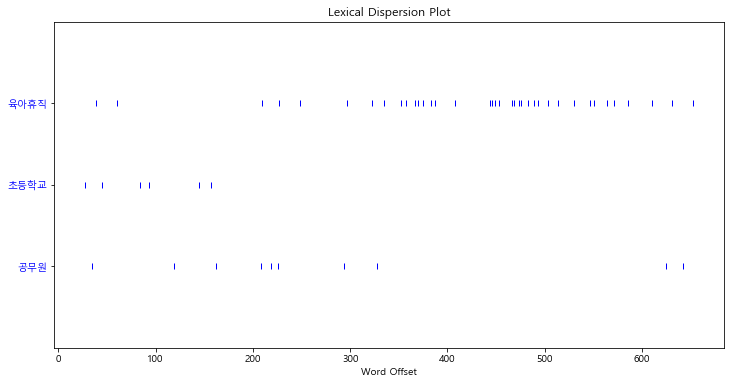

In [46]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [35]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
필요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임
개정 법률 지방공무원법 일부 다음 개정 제 조제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년
이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 이하 여 여자 공무원 자녀 임신 출산 때 생 략 생 략 현행


In [36]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


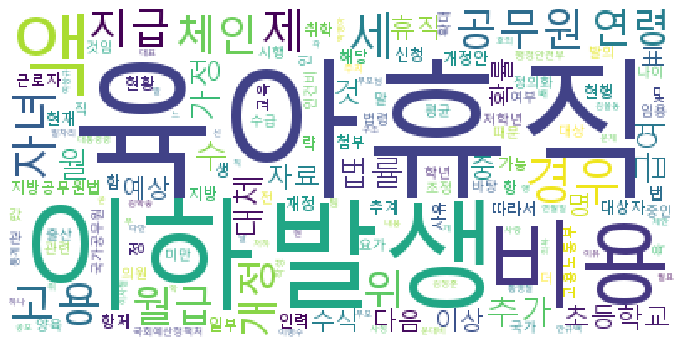

In [47]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 8-5. Naive Bayes Classifier의 이해 - 영문

In [58]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [59]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [61]:
# word_tokenize('i like you')
for sentence in train:
    print(sentence)
    for word in word_tokenize(sentence[0]):
        print(word)

('i like you', 'pos')
i
like
you
('i hate you', 'neg')
i
hate
you
('you like me', 'neg')
you
like
me
('i like her', 'pos')
i
like
her


In [62]:
for sentence in train:
    print(sentence)

('i like you', 'pos')
('i hate you', 'neg')
('you like me', 'neg')
('i like her', 'pos')


In [69]:
all_words = set(word.lower() for sentence in train 
                                                            for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [72]:
for x in train:
    for word in all_words:
        print("'%s':"%(word), word in word_tokenize(x[0]))

'her': False
'i': True
'hate': False
'you': True
'me': False
'like': True
'her': False
'i': True
'hate': True
'you': True
'me': False
'like': False
'her': False
'i': False
'hate': False
'you': True
'me': True
'like': True
'her': True
'i': True
'hate': False
'you': False
'me': False
'like': True


In [73]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'her': False,
   'i': True,
   'hate': False,
   'you': True,
   'me': False,
   'like': True},
  'pos'),
 ({'her': False,
   'i': True,
   'hate': True,
   'you': True,
   'me': False,
   'like': False},
  'neg'),
 ({'her': False,
   'i': False,
   'hate': False,
   'you': True,
   'me': True,
   'like': True},
  'neg'),
 ({'her': True,
   'i': True,
   'hate': False,
   'you': False,
   'me': False,
   'like': True},
  'pos')]

In [74]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                      me = False             pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0


In [75]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'her': False,
 'i': True,
 'hate': False,
 'you': False,
 'me': False,
 'like': True}

In [76]:
classifier.classify(test_sent_features)

'pos'

## 8-6. Naive Bayes Classifier의 이해 - 한글

In [77]:
from konlpy.tag import Twitter

In [78]:
pos_tagger = Twitter()

C:\Users\edu\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [79]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [80]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [82]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'지루해': False,
   '고양이도': False,
   '메리는': False,
   '마치고': False,
   '메리랑': False,
   '이쁜': False,
   '놀거야': False,
   '좋아': True,
   '수업이': False,
   '난': False,
   '고양이야': False,
   '메리가': True},
  'pos'),
 ({'지루해': False,
   '고양이도': True,
   '메리는': False,
   '마치고': False,
   '메리랑': False,
   '이쁜': False,
   '놀거야': False,
   '좋아': True,
   '수업이': False,
   '난': False,
   '고양이야': False,
   '메리가': False},
  'pos'),
 ({'지루해': True,
   '고양이도': False,
   '메리는': False,
   '마치고': False,
   '메리랑': False,
   '이쁜': False,
   '놀거야': False,
   '좋아': False,
   '수업이': True,
   '난': True,
   '고양이야': False,
   '메리가': False},
  'neg'),
 ({'지루해': False,
   '고양이도': False,
   '메리는': True,
   '마치고': False,
   '메리랑': False,
   '이쁜': True,
   '놀거야': False,
   '좋아': False,
   '수업이': False,
   '난': False,
   '고양이야': True,
   '메리가': False},
  'pos'),
 ({'지루해': False,
   '고양이도': False,
   '메리는': False,
   '마치고': True,
   '메리랑': True,
   '이쁜': False,
   '놀거야': True,
   '좋아': False,
   '수업이': False,
   '난': T

In [84]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0


In [85]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [86]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'지루해': False,
 '고양이도': False,
 '메리는': False,
 '마치고': False,
 '메리랑': True,
 '이쁜': False,
 '놀거야': True,
 '좋아': False,
 '수업이': True,
 '난': True,
 '고양이야': False,
 '메리가': False}

In [87]:
classifier.classify(test_sent_features)

'neg'

In [88]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [89]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [90]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [91]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [92]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [93]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [94]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [95]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [96]:
classifier.show_most_informative_features()

Most Informative Features
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  야/Josa = False             neg : pos    =      1.1 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                  랑/Josa = False             neg : pos    =      1.1 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0


In [97]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [98]:
classifier.classify(test_sent_features)

'pos'

## 8-7. 문장의 유사도 측정

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
vectorizer = CountVectorizer(min_df = 1)

In [101]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [102]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [104]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [111]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features


(4, 22)

In [106]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [125]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    print(delta.toarray().shape)
    return sp.linalg.norm(delta.toarray())

In [126]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

(1, 22)
== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
(1, 22)
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
(1, 22)
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
(1, 22)
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [133]:
from konlpy.tag import Twitter
t = Twitter()

In [134]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [135]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [136]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [137]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [138]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [139]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [140]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [141]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [142]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [143]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [146]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [147]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [172]:
def dist_norm(v1, v2):
    print(v1.toarray())
    print(v2.toarray())
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [173]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
== Post 0 with dist=0.88   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
== Post 1 with dist=1.09   : 메리는 공원에서 산책하고 노는 것을 싫어해요
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
== Post 2 with dist=1.05   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
[[1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [174]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 0, dist = 0.88
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


In [175]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]
# for w in set(a):
#     print(a.count(w))
tf = float(a.count('a')) / sum(a.count(w) for w in set(a))
tf
# len([doc for doc in D if 'a' in doc])
# len(D)
# idf = sp.log( float(len(D))/(len([doc for doc in D if 'a' in doc])) )

1.0

In [20]:
import scipy as sp
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(4)/(len([doc for doc in D if t in doc])) )
    return tf , idf

str = '메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?'
a = str.split(' ')
print(a)
D = [a]
print(tfidf('가고', a, D))

['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?']
(0.125, 1.3862943611198906)


C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  after removing the cwd from sys.path.


0.0


In [177]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [178]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [185]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    print(sentence)
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?
 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요
 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .
 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요


(4, 20)

In [181]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [182]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [183]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [184]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

[[0.43003652 0.         0.         0.         0.43003652 0.
  0.27448674 0.         0.43003652 0.         0.         0.
  0.43003652 0.43003652 0.         0.         0.         0.
  0.         0.        ]]
[[0.57457953 0.4530051  0.         0.         0.57457953 0.
  0.36674667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]
== Post 0 with dist=0.90   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
[[0.         0.39954636 0.         0.         0.         0.
  0.32346721 0.         0.         0.5067739  0.39954636 0.
  0.         0.         0.39954636 0.         0.         0.
  0.         0.39954636]]
[[0.57457953 0.4530051  0.         0.         0.57457953 0.
  0.36674667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]
== Post 1 with dist=1.18   : 메리는 공원에서 산책하고 노는 것을 싫어해요
[[0.         0.43584673 0.         0.         0.         0.
  0.352855

## 8-8. 여자 친구 선물 고르기

In [21]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [22]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [23]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여친 선물로 에어맥스 97 데저트샌드   2020.03.12.   여친 선물로 에어맥스 97 데저트샌드 사주고싶어서 그런데 여기가 가장 믿을만한거 같은데 사이트 정품취급하는곳인가요? https://m.smartstore.naver.com/nonshop...   답변 제품을 받아봐야 정답이 나오겠는데 의심이 되네요 패스하시는게 정신건강에 좋겠고 다른 정품사이트는 메일로 보내드릴테니 참고하시길 바랍니다.    닉네임코비진스   ',
 '  질문  여친 선물 뭐가 좋을까요?   2020.07.31.   100일 선물로 간단한거 해보고 싶은데 뭐가 좋을까요?? 넘 고가 말고 좋은거 알고 싶습니다.   답변 정확한 금액대를 알려주셨으면 거기에 맞는 선물을 추천 해드리기 좋았을텐데요. 선물에는 의미가 있는게 가장 좋아요 무조건 고가 선물 이라고 좋은건 아니에요....    닉네임공쥬S2   ',
 '  질문  여친선물로 뭘 줘야 할까요?   2020.05.21.   여친선물로 뭘 줘야 할까요?   답변 안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이 돌 수 있는 목걸이,반지...    닉네임Shine09749 블로그   ',
 '  질문  천여여친 선물 추   2020.06.21.   천여여친 선물 추   답변 쥬얼리여 ^^    닉네임으앙   ',
 '  질문  여우님!! 정품문의 답변즘여 여친선물인데....   2020.01.29.   셀렉온에서 구매했으며 EATTREND에서 물품 배송되었어요. 메종 마르지엘라 5AC 미니백 부탁드립니다. 여친선물이에요... 꼼꼼히... 부탁...

In [24]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [25]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여자친구선물 감동 줄 수 있는 걸로 추천해 주세요   2020.08.05.   여자친구선물로 감동 줄 수 있을 만한 것들에 뭐가... 본인 돈으로 안 끊을 거 잘 아니까 여자친구선물로 관리권... 요즘 인기 많은 것도 좋으니 여자친구선물 추천 부탁드려요!   답변 여자친구선물로 경락 관리권 정말 신선하네요~ 여자친구선물이나 아내선물로 남편, 남자친구들이 관리권 많이... 있어요 여자친구선물로 관리권 주신다면 여자친구분께서...    닉네임랑랑피트니스   ',
 '  질문  여자친구 선물 추천 부탁드려요~   2020.01.20.   저기요...여자친구 선물 추천 좀 해 주세요~ 너무 부담스럽지 않은 가벼운 종류로 찾고... 없이 좋아하면서도 실용적인 그런 종류로 괜찮은 여자친구 선물 추천 부탁드립니다~   답변 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨... 같아서 여자친구 선물 추천으로 딱인 것 같아요~~ 저도... 역시 여자친구 선물 추천이라고 하면 꽃!! 하지만 진짜...    닉네임hm8h****   ',
 '  질문  여자친구 선물 추천   2020.07.13.   3주년이예요   답변 약간 명품으로 지갑선물 어떠실까요~?    닉네임in time   ',
 '  질문  여자친구 선물로 감동적인게 뭐가 있을까요?   2020.04.07.   나중에 헤어진다고 해도 평생 저를 잊을 수 없는 선물을 해주고 싶어요 선물이라는게 정성이지만 직접 만들고 꾸미는 건 재주가 없어서 못하고요 여자친구 선물로...   답변 안녕하세요 여자친구 선물을 고민하고 계시군요 제가... 있더라고요 여자 친구 선물로 값비싼 선물보다 오래도록... 있고요 여자친구 선물로 로

In [27]:
len(present_candi_text)

1300

In [28]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

C:\Users\edu\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [30]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [31]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '여자친구',
 '선물',
 '감동',
 '줄',
 '수',
 '있는',
 '걸',
 '로',
 '추천',
 '해',
 '주세요',
 '2020.08',
 '.',
 '05',
 '.',
 '여자친구',
 '선물',
 '로',
 '감동',
 '줄',
 '수',
 '있을',
 '만',
 '한',
 '것',
 '들',
 '에',
 '뭐',
 '가',
 '...',
 '본인',
 '돈',
 '으로',
 '안',
 '끊을',
 '거',
 '잘',
 '아니까',
 '여자친구',
 '선물',
 '로',
 '관리',
 '권',
 '...',
 '요즘',
 '인기',
 '많은',
 '것',
 '도',
 '좋으니',
 '여자친구',
 '선물',
 '추천',
 '부탁드려요',
 '!',
 '답변',
 '여자친구',
 '선물',
 '로',
 '경락',
 '관리',
 '권',
 '정말',
 '신선하네요',
 '~',
 '여자친구',
 '선물',
 '이나',
 '아내',
 '선물',
 '로',
 '남편',
 ',',
 '남자친구',
 '들',
 '이',
 '관리',
 '권',
 '많이',
 '...',
 '있어요',
 '여자친구',
 

In [108]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

109400
467


In [32]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 5200),
 ('여자친구', 4200),
 ('.', 3000),
 ('추천', 2300),
 ('...', 2200),
 ('로', 1800),
 ('질문', 1100),
 ('답변', 1100),
 ('가', 1000),
 ('를', 900),
 ('닉네임', 900),
 ('을', 800),
 ('화장품', 800),
 ('-', 800),
 ('도', 700),
 ('이', 700),
 ('으로', 600),
 ('대', 600),
 ('단어', 500),
 ('의', 500),
 ('수', 500),
 ('20', 500),
 ('요', 500),
 ('****', 500),
 ('제', 500),
 ('검색', 400),
 ('것', 400),
 ('에', 400),
 ('거', 400),
 ('관리', 400),
 ('권', 400),
 ('~', 400),
 ('저', 400),
 ('여자', 400),
 ('뷰티', 400),
 ('팩트', 400),
 ('인지', 400),
 ('입력', 300),
 ('포함', 300),
 ('하는', 300),
 ('/', 300),
 ('합니다', 300),
 ('감동', 300),
 ('부탁드려요', 300),
 (',', 300),
 ('좀', 300),
 ('괜찮은', 300),
 ('같아요', 300),
 ('?', 300),
 ('게', 300),
 ('24', 300),
 ('입니다', 300),
 ('목걸이', 300),
 ('어떤', 300),
 ('해주세요', 300),
 ('생일', 300),
 ('ysl', 300),
 ('해주려고', 300),
 ('하는데', 300),
 ('한', 200),
 ('된', 200),
 ('때', 200),
 ('는', 200),
 ('해서', 200),
 ('줄', 200),
 ('해', 200),
 ('주세요', 200),
 ('들', 200),
 ('뭐', 200),
 ('잘', 200),
 ('!', 200),
 ('2020.0

In [33]:
ko.similar('여자친구')

생일


In [35]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 5200),
 ('여자친구', 4200),
 ('추천', 2300),
 ('닉네임', 900),
 ('화장품', 800),
 ('-', 800),
 ('****', 500),
 ('검색', 400),
 ('관리', 400),
 ('권', 400),
 ('저', 400),
 ('여자', 400),
 ('뷰티', 400),
 ('팩트', 400),
 ('인지', 400),
 ('입력', 300),
 ('포함', 300),
 ('/', 300),
 ('합니다', 300),
 ('감동', 300),
 ('부탁드려요', 300),
 ('괜찮은', 300),
 ('같아요', 300),
 ('24', 300),
 ('입니다', 300),
 ('목걸이', 300),
 ('해주세요', 300),
 ('생일', 300),
 ('ysl', 300),
 ('해주려고', 300),
 ('하는데', 300),
 ('된', 200),
 ('해서', 200),
 ('해', 200),
 ('주세요', 200),
 ('!', 200),
 ('2020.01', 200),
 ('종류', 200),
 ('적', 200),
 ('그런', 200),
 ('스킨', 200),
 ('꽃', 200),
 ('8', 200),
 ('2020.07', 200),
 ('13', 200),
 ('잊을', 200),
 ('없는', 200),
 ('해주고', 200),
 ('하고요', 200),
 ('안녕하세요', 200)]

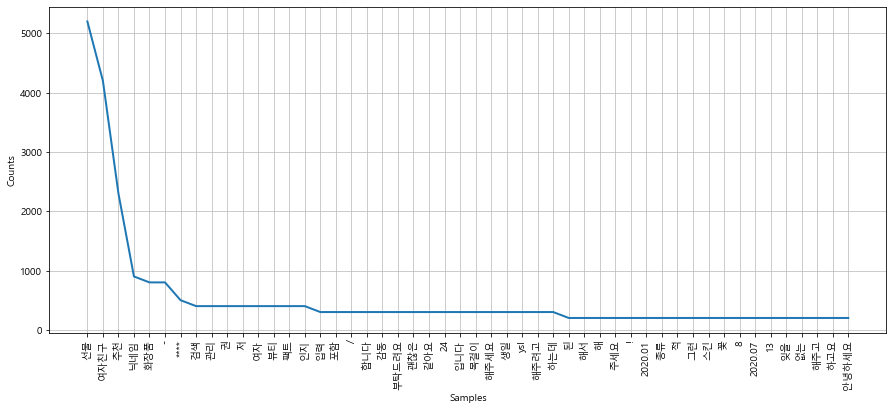

In [36]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [37]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

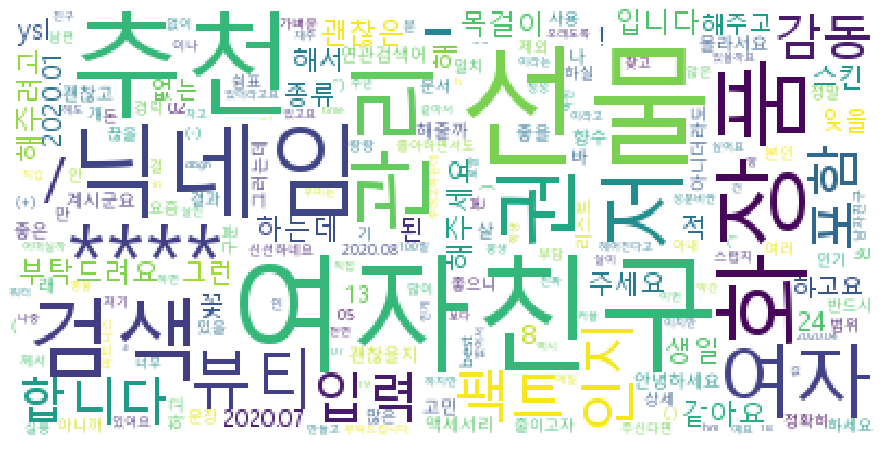

In [39]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [40]:
mask = np.array(Image.open('../data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [41]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

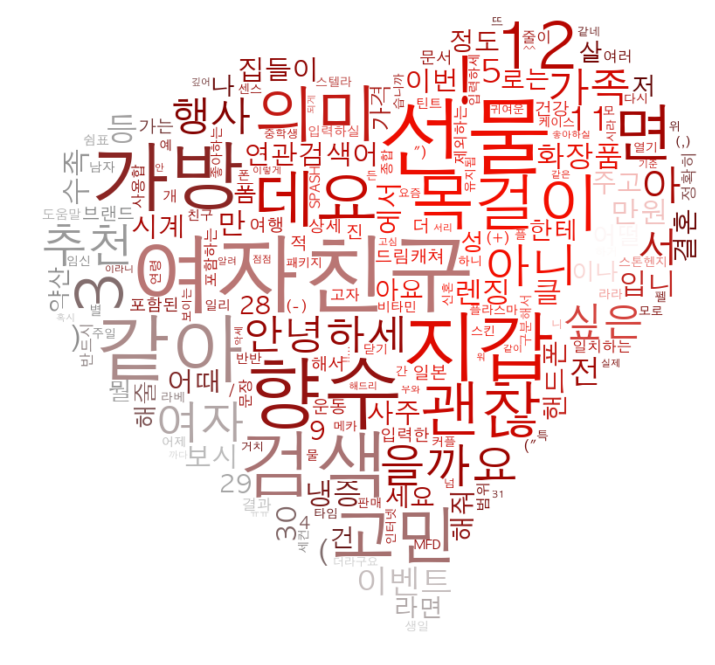

In [122]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

* gensim install : **pip install gensim**

In [43]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110324 sha256=38315c6091e5d614b3a9fc1d9d1d10b1a4d1f118bc3eb5b49fa97dbe1c819cf2
  Stored in directory: c:\users\edu\appdata\local\pip\cache\wheels\56\b5\6d\86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.15
    Uninstalling Cython-0.29.15:
      Successfully uninstalled Cython-0.29.15
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


ERROR: fbprophet 0.6 requires cmdstanpy==0.4, which is not installed.
ERROR: fbprophet 0.6 requires setuptools-git>=1.2, which is not installed.


In [44]:
import gensim
from gensim.models import word2vec

In [46]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희

기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희

질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타

질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 

질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추

질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시

질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추

질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com

질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추

기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희

질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com

질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 

질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친

질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com

질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 

질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추

질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여자친구 선물 감동 줄 수 있다 것 추천 하다 줄다 2020.08 05 여자친구 선물 감동 줄 수 있다 만 것 들 뭐 본인 돈 안 끊다 거 자다 아니다 여자친구 선물 관리 권 요즘 인기 많다 것 좋다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 경락 관리 권 정말 신선하다 여자친구 선물 아내 선물 남편 남자친구 들 관리 권 많이 있다 여자친구 선물 관리 권 주다 여자친구 분 닉네임 랑랑 피트니스
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추

질문 여자친구 선물 2020.07 24 제 이번 100일 로 여자친구 선물 주다 여자친구 19 살이 제 18 살인 학생 커플 이다 여자친구 매일 목걸이 차고 저 데이트 하 는걸 제 보다 답변 핸드 메이드 액세서리 쇼핑몰 RUHEN 루 추천 하다 데 일리 스트릿 스타일 남녀 공용 액세서리 이다 1:1 맞춤 제작 희소성 있다 소장 가치 높다 길이 닉네임 ruhe
질문 여자친구 선물 2020.02 13 선물 해주다 싶다 어떻다 선물 나다 향수 그런 거도 포함 하다 받다 좋다 거 같다 선물 추천 해주다 답변 안녕하다 질문 자 님 여자친구 생일 선물 고민 계시다 향수 꽃 좋다 쥬얼리 좋아하다 목걸이 팔찌 좋다 것 같다 답변 도움 되어다 하다 좋다 하루 닉네임 paige
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 

질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ https://timeanbox.com/women-friends-greats-gifts/ 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉 이다 차차
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 닉네임 정품
질문 20 살 여자친구 선물 리스트 추천 부 2020.01 24 20 살 여자친구 선물 리스트 추천 부탁드리다 답변 https://sonmastem.com/20 대다 30 대다 여자친구 선물 추천 best 7 https://sonmastem.com/10 대다 20 대다 생일 선물 추천 best 8 좋다 선물 되다 닉네임 wowd
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 

In [47]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [49]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

In [50]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [51]:
model.most_similar(positive=['선물'])

C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.7099089622497559),
 ('부탁드리다', 0.3941587805747986),
 ('찾다', 0.3750872015953064),
 ('부담', 0.34146466851234436),
 ('꽃', 0.3296474814414978),
 ('질문', 0.31363216042518616),
 ('않다', 0.2988501489162445),
 ('2020.07', 0.289706826210022),
 ('너무', 0.28286221623420715),
 ('좋다', 0.27886638045310974)]

In [52]:
model.most_similar(positive=['여자친구'])

C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.7099089622497559),
 ('주다', 0.3664560616016388),
 ('부탁드리다', 0.34990179538726807),
 ('질문', 0.32764965295791626),
 ('추천', 0.3238722085952759),
 ('경락', 0.31631597876548767),
 ('여자', 0.31088629364967346),
 ('30', 0.30803269147872925),
 ('아내', 0.293927937746048),
 ('답변', 0.28180059790611267)]